## Dependencies & Resources

In [ ]:
!pip -q install gdown
!pip -q install --upgrade keras
!pip -q install --upgrade tensorflow
!pip -q install tensorflowjs

In [ ]:
!gdown 16UyL-llRwe9bUenCiFfFS-PtZsudFZmP; unzip test.zip; rm test.zip #data test
!gdown 1zBiPXW_5zZHYHPlTUHKfQ84uqXnITnEC #model
!gdown 1n3QnrGxL-PtqPlsG353l9e3-fIjX-4wz #model2
!gdown 1srL8eI5uAclFvXyBPqZyR8B3Duy11kfM #model3

Downloading...
From (original): https://drive.google.com/uc?id=16UyL-llRwe9bUenCiFfFS-PtZsudFZmP
From (redirected): https://drive.google.com/uc?id=16UyL-llRwe9bUenCiFfFS-PtZsudFZmP&confirm=t&uuid=7f438e5c-a7c1-4f3f-882c-e4aa8337cba2
To: /content/test.zip
100% 34.3M/34.3M [00:00<00:00, 77.1MB/s]
Archive:  test.zip
replace test/Cataract/cat_0_100_jpg.rf.7b909664831098dcfeb63ef0cfa33cd3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Downloading...
From: https://drive.google.com/uc?id=1zBiPXW_5zZHYHPlTUHKfQ84uqXnITnEC
To: /content/first_model.h5
100% 16.9M/16.9M [00:00<00:00, 131MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1n3QnrGxL-PtqPlsG353l9e3-fIjX-4wz
To: /content/my_model.h5
100% 35.5M/35.5M [00:00<00:00, 39.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1srL8eI5uAclFvXyBPqZyR8B3Duy11kfM
To: /content/best_model.h5
100% 53.3M/53.3M [00:00<00:00, 61.1MB/s]


## Load Model

In [ ]:
import tensorflow as tf

model3 = tf.keras.models.load_model('/content/best_model.h5', compile=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,436,161 (16.92 MB)

 Trainable params: 4,436,161 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model3.predict(image_array))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.92840743]]


## Model 1 (MobileNetV2 Transfer Learning)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


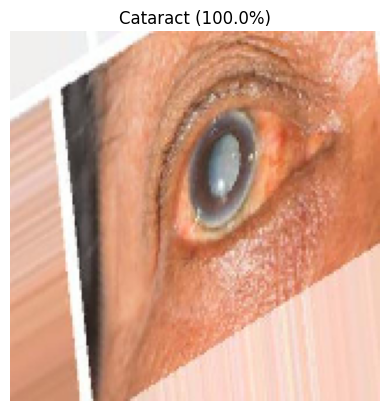

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

folder_path = '/content/test/Cataract'
# folder_path = '/content/test/Normal'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

random_image_path = random.choice(image_files)
image = tf.keras.preprocessing.image.load_img(random_image_path, target_size=(160, 160))
#image = tf.keras.preprocessing.image.load_img('/content/katarak.jpg', target_size=(160, 160)) # kalo mau nyoba pake gambar sendiri

# Preprocess
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255.0

# Predik
prediction = model.predict(image_array)[0]

confidence = prediction[0]
label = "Normal" if confidence > 0.5 else "Cataract"
confidence_rate = confidence if confidence > 0.5 else 1 - confidence

# Display
plt.imshow(image)
plt.title(f"{label} ({confidence_rate*100:.1f}%)")
plt.axis('off')
plt.show()


## Model 2 (Custom Layer - Trial)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


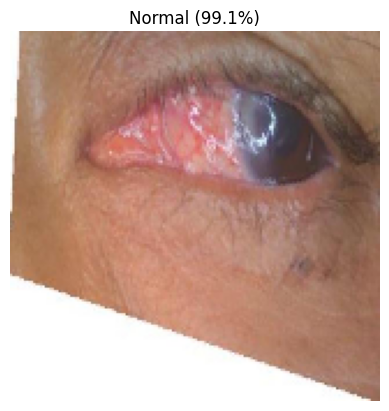

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

folder_path = '/content/test/Cataract'
# folder_path = '/content/test/Normal'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

random_image_path = random.choice(image_files)
image = tf.keras.preprocessing.image.load_img(random_image_path, target_size=(160, 160))
# image = tf.keras.preprocessing.image.load_img('/content/image.png', target_size=(160, 160)) # kalo mau nyoba pake gambar sendiri

# Preprocess
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255.0

# Predik
prediction = model2.predict(image_array)[0]

confidence = prediction[0]
label = "Normal" if confidence > 0.5 else "Cataract"
confidence_rate = confidence if confidence > 0.5 else 1 - confidence

# Display
plt.imshow(image)
plt.title(f"{label} ({confidence_rate*100:.1f}%)")
plt.axis('off')
plt.show()


## Model 3 (Custom Layer - Final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


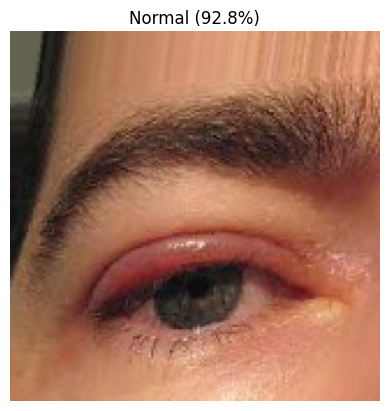

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

folder_path = '/content/test/Cataract'
folder_path = '/content/test/Normal'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

random_image_path = random.choice(image_files)
image = tf.keras.preprocessing.image.load_img(random_image_path, target_size=(160, 160))
#image = tf.keras.preprocessing.image.load_img('/content/katarak.jpg', target_size=(160, 160)) # kalo mau nyoba pake gambar sendiri

# Preprocess
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255.0

# Predik
prediction = model3.predict(image_array)[0]

confidence = prediction[0]
label = "Normal" if confidence > 0.5 else "Cataract"
confidence_rate = confidence if confidence > 0.5 else 1 - confidence

# Display
plt.imshow(image)
plt.title(f"{label} ({confidence_rate*100:.1f}%)")
plt.axis('off')
plt.show()


## Convert

In [ ]:
# # convert ke tensorflowjs
# !tensorflowjs_converter --input_format=keras ./best_model.h5 ./model_json
# !zip -r compressed.zip ./model_json